# Introduction to Network Analysis and Visualizing Network Graphs

In this class, we will learn the basic concepts of network analysis, how to analyze pre-collected network data and how to visualize network graphs using Python. 

## 1. Understanding Networks and Their Importance in Communication Research

A network is a set of items, which we call nodes (or vertices), with connections between them, known as edges (or links). For example, a group of friends can be considered a network where individuals are nodes and friendships are edges.

In a communication network, nodes could be individuals, organizations, or even websites, and edges can represent communication between them, such as emails, phone calls, mentions, hyperlinks, etc.

Network Analysis allows us to analyze these nodes and edges to uncover the underlying structures and patterns. This approach is widely used in various fields, including communication research.

For example, consider a communication research question such as "Who are the most influential users on Twitter during a major event?" or "What are the key themes emerging from the communication between users?" Network analysis can provide answers to these questions. 

Now, let's visually understand the basic elements of a network using a simulated data.

In [1]:
!pip install networkx

  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)


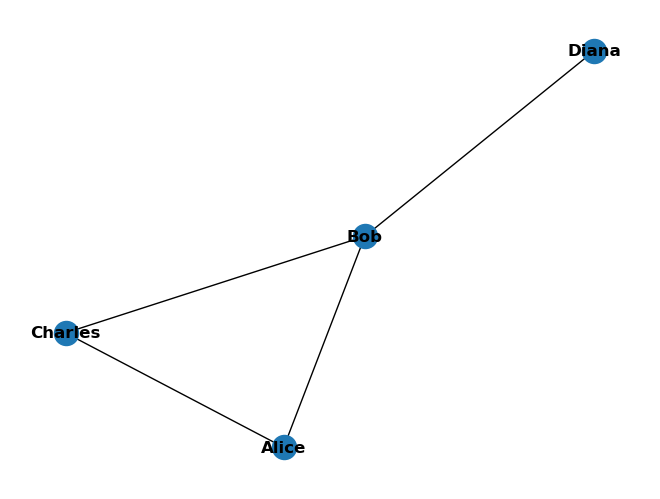

In [2]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Define nodes and edges
nodes = ["Alice", "Bob", "Charles", "Diana"]
edges = [("Alice", "Bob"), ("Alice", "Charles"), ("Bob", "Charles"), ("Bob", "Diana")]

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

## 2. Analyzing Network Data

Network data typically involves pairs of nodes that represent a relationship or interaction. These pairs can be represented in various data structures such as edge lists, adjacency lists, adjacency matrices, and more complex structures like graph objects in NetworkX.

### 2.1 Edge Lists
An edge list is a simple way to represent a network. It is essentially a list of node pairs (edges) that are connected in the network. Each pair represents a unique relationship.

### 2.2 Adjacency Lists
An adjacency list associates each node with a list of nodes to which it is directly connected. It's useful for networks where information about neighbors of each node is more relevant than overall connections.

### 2.3 Adjacency Matrices
In an adjacency matrix, both the rows and columns correspond to nodes in the network, and each cell represents a possible edge. It is especially useful for identifying the presence or absence of edges between pairs of nodes.

Let's simulate these data structures.

In [3]:
# Simulated edge list
edge_list = [("Alice", "Bob"), ("Alice", "Charles"), ("Bob", "Charles"), ("Bob", "Diana")]

# Simulated adjacency list
adjacency_list = {"Alice": ["Bob", "Charles"], "Bob": ["Alice", "Charles", "Diana"], "Charles": ["Alice", "Bob"], "Diana": ["Bob"]}

# Simulated adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

print("Edge List:", edge_list)
print("\nAdjacency List:", adjacency_list)
print("\nAdjacency Matrix:\n", adjacency_matrix)

Edge List: [('Alice', 'Bob'), ('Alice', 'Charles'), ('Bob', 'Charles'), ('Bob', 'Diana')]

Adjacency List: {'Alice': ['Bob', 'Charles'], 'Bob': ['Alice', 'Charles', 'Diana'], 'Charles': ['Alice', 'Bob'], 'Diana': ['Bob']}

Adjacency Matrix:
 [[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]


### 2.4 Simulated Twitter Dataset

Let's create a Twitter dataset that represents the relationship of retweets between different users.

In a Twitter network, the nodes can be the users, and the edges can be the interactions between them. For simplicity, let's consider only one type of interaction - retweets.

In [4]:
import pandas as pd
import numpy as np

# Simulate the dataset
np.random.seed(0)  # for reproducibility
n_users = 100
n_tweets = 500

users = [f'user_{i}' for i in range(1, n_users+1)]
tweet_user = np.random.choice(users, n_tweets)  # randomly assign a user to each tweet
retweet_user = np.random.choice(users, n_tweets)  # randomly assign a retweeting user to each tweet

twitter_data = pd.DataFrame({
    'tweet_id': range(1, n_tweets+1),
    'tweet_user': tweet_user,
    'retweet_user': retweet_user
})

print(twitter_data.head())

   tweet_id tweet_user retweet_user
0         1    user_45      user_40
1         2    user_48      user_25
2         3    user_65      user_59
3         4    user_68      user_37
4         5    user_68     user_100


In this simulated dataset, each row represents a tweet, which includes the ID of the tweet, the user who made the original tweet, and the user who retweeted the tweet.

In [5]:
# create a graph from the dataframe
G = nx.from_pandas_edgelist(twitter_data, "tweet_user", "retweet_user", create_using=nx.Graph())

# Calculate basic properties
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 100
Number of edges: 483


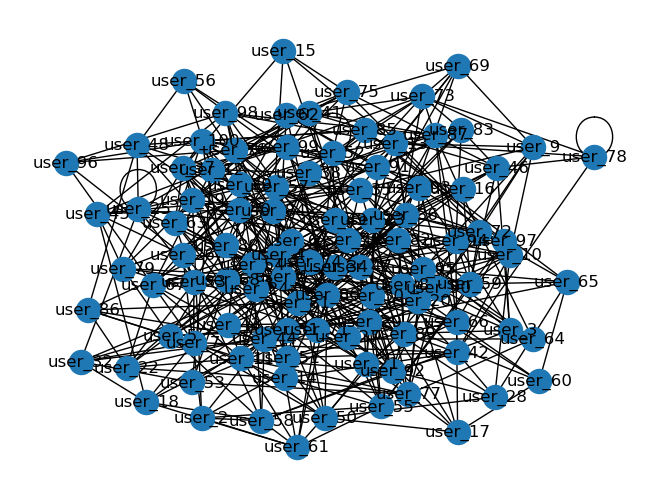

In [7]:
# Draw the graph
pos = nx.spring_layout(G, scale=5)  # double distance between all nodes
nx.draw(G, pos, with_labels=True, font_weight='normal')
plt.show()

In [8]:
twitter_data[twitter_data["tweet_user"]=="user_17"]

,tweet_id,tweet_user,retweet_user
187,188,user_17,user_60
337,338,user_17,user_80
440,441,user_17,user_30


In [9]:
twitter_data[twitter_data["retweet_user"]=="user_17"]

,tweet_id,tweet_user,retweet_user
170,171,user_20,user_17
392,393,user_50,user_17
407,408,user_66,user_17
467,468,user_21,user_17


## 3. Network Measures and their significance in Communication Research

1. Degree: The degree of a node is the number of other nodes to which it is connected. In communication research, this could mean the number of different users a particular user interacts with.

2. Centrality: Centrality measures indicate the most important vertices within a graph. Importance is calculated based on the connection to other nodes. In a communication network, users with high centrality might be influencers or thought leaders.

3. Clustering Coefficient: The clustering coefficient measures the degree to which nodes in a graph tend to cluster together. In communication networks, a high clustering coefficient might indicate a tight-knit community with lots of mutual communication.

In the next section, we'll compute these measures on our Twitter network.

### 3.1 Degree

The degree of a node in a network is the number of connections or edges the node has to other nodes. It's one of the simplest and most fundamental concepts in network analysis and is incredibly important in a wide variety of contexts.

In communication research, the degree of a node might represent the number of connections a person has in a social network, the number of mentions a user has on Twitter, or the number of incoming links a web page has in a hyperlink network.

#### NetworkX Function for Degree

We can use NetworkX to easily get the degree of nodes in a network. Here's an example:

In [10]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [12]:
degree_dict

{'user_45': 7,
 'user_40': 11,
 'user_48': 7,
 'user_25': 9,
 'user_65': 7,
 'user_59': 13,
 'user_68': 15,
 'user_37': 14,
 'user_100': 11,
 'user_10': 10,
 'user_70': 15,
 'user_84': 13,
 'user_7': 10,
 'user_22': 8,
 'user_4': 13,
 'user_99': 9,
 'user_88': 14,
 'user_41': 8,
 'user_71': 10,
 'user_61': 9,
 'user_89': 11,
 'user_34': 12,
 'user_29': 9,
 'user_13': 12,
 'user_69': 7,
 'user_27': 9,
 'user_66': 11,
 'user_97': 8,
 'user_52': 12,
 'user_74': 11,
 'user_47': 12,
 'user_54': 14,
 'user_82': 12,
 'user_38': 10,
 'user_8': 11,
 'user_26': 9,
 'user_95': 11,
 'user_78': 6,
 'user_73': 11,
 'user_85': 8,
 'user_21': 14,
 'user_81': 12,
 'user_86': 7,
 'user_92': 13,
 'user_80': 14,
 'user_72': 12,
 'user_83': 8,
 'user_96': 5,
 'user_1': 17,
 'user_50': 9,
 'user_6': 11,
 'user_30': 13,
 'user_20': 10,
 'user_31': 12,
 'user_15': 5,
 'user_33': 9,
 'user_93': 10,
 'user_9': 8,
 'user_58': 9,
 'user_44': 13,
 'user_32': 7,
 'user_75': 8,
 'user_24': 9,
 'user_39': 8,
 'user_3

Here, `G.degree(G.nodes())` returns a DegreeView object that we convert to a dictionary. Then we use `nx.set_node_attributes()` to assign each node's degree as a node attribute.

#### Visualizing Degree

When visualizing a network, nodes with a higher degree can be displayed with a larger size or a different color.

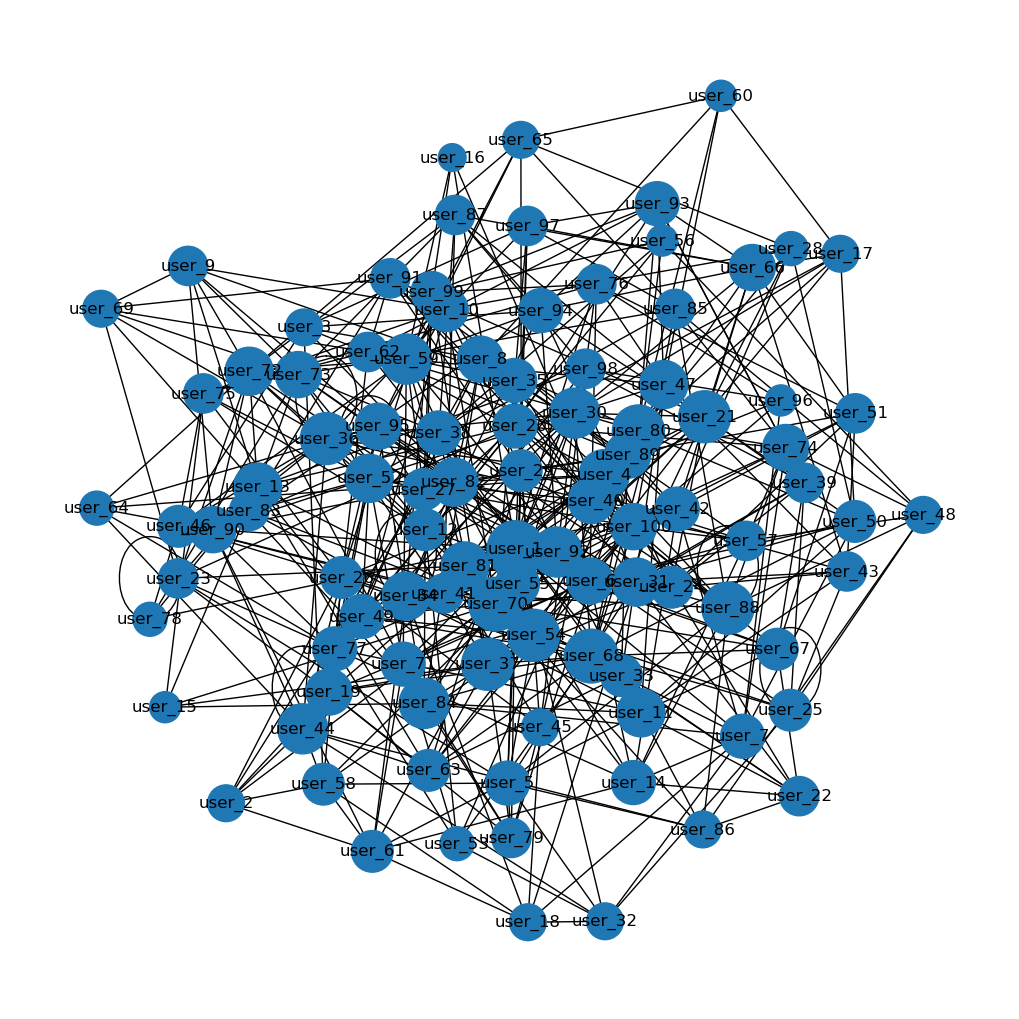

In [11]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=[v * 100 for v in degree_dict.values()], with_labels=True)
plt.show()

### 3.2 Centrality

Centrality measures identify the most important nodes in a network. There are many different ways of defining "importance" and accordingly many different centrality measures.

In communication research, centrality could be used to identify key influencers in a social network, or major hubs in a transportation network.

#### NetworkX Functions for Centrality

NetworkX has functions to compute several centrality measures, including degree centrality (`nx.degree_centrality()`), closeness centrality (`nx.closeness_centrality()`), and betweenness centrality (`nx.betweenness_centrality()`).

Here's an example of how to compute degree centrality:

In [16]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_dict

{'user_45': 0.007493320898658932,
 'user_40': 0.01646625234234904,
 'user_48': 0.006275369678912915,
 'user_25': 0.008503582211701822,
 'user_65': 0.00788400042115389,
 'user_59': 0.023710777901589656,
 'user_68': 0.025109948896267092,
 'user_37': 0.02233651870805133,
 'user_100': 0.015874572247378108,
 'user_10': 0.01362875611293779,
 'user_70': 0.028957319304612848,
 'user_84': 0.02194500559801059,
 'user_7': 0.01730135802361771,
 'user_22': 0.006484203057315556,
 'user_4': 0.022444377447555404,
 'user_99': 0.014640492448553472,
 'user_88': 0.018723465511089655,
 'user_41': 0.010386013428241343,
 'user_71': 0.014593629209148397,
 'user_61': 0.009714413317704434,
 'user_89': 0.013924455764585529,
 'user_34': 0.015490313284848522,
 'user_29': 0.010926166407109982,
 'user_13': 0.021605727300350486,
 'user_69': 0.004836189492444338,
 'user_27': 0.012307629970780968,
 'user_66': 0.0132388744412325,
 'user_97': 0.00879561429781518,
 'user_52': 0.01399477105850564,
 'user_74': 0.01581238909

In [13]:
centrality_dict = nx.degree_centrality(G)
nx.set_node_attributes(G, centrality_dict, 'centrality')

In [14]:
centrality_dict

{'user_45': 0.07070707070707072,
 'user_40': 0.11111111111111112,
 'user_48': 0.07070707070707072,
 'user_25': 0.09090909090909091,
 'user_65': 0.07070707070707072,
 'user_59': 0.13131313131313133,
 'user_68': 0.15151515151515152,
 'user_37': 0.14141414141414144,
 'user_100': 0.11111111111111112,
 'user_10': 0.10101010101010102,
 'user_70': 0.15151515151515152,
 'user_84': 0.13131313131313133,
 'user_7': 0.10101010101010102,
 'user_22': 0.08080808080808081,
 'user_4': 0.13131313131313133,
 'user_99': 0.09090909090909091,
 'user_88': 0.14141414141414144,
 'user_41': 0.08080808080808081,
 'user_71': 0.10101010101010102,
 'user_61': 0.09090909090909091,
 'user_89': 0.11111111111111112,
 'user_34': 0.12121212121212122,
 'user_29': 0.09090909090909091,
 'user_13': 0.12121212121212122,
 'user_69': 0.07070707070707072,
 'user_27': 0.09090909090909091,
 'user_66': 0.11111111111111112,
 'user_97': 0.08080808080808081,
 'user_52': 0.12121212121212122,
 'user_74': 0.11111111111111112,
 'user_47':

In [15]:
closeness_dict = nx.closeness_centrality(G)
closeness_dict

{'user_45': 0.41422594142259417,
 'user_40': 0.4604651162790698,
 'user_48': 0.39759036144578314,
 'user_25': 0.4194915254237288,
 'user_65': 0.4125,
 'user_59': 0.4714285714285714,
 'user_68': 0.4782608695652174,
 'user_37': 0.47368421052631576,
 'user_100': 0.4479638009049774,
 'user_10': 0.45,
 'user_70': 0.4782608695652174,
 'user_84': 0.4782608695652174,
 'user_7': 0.44594594594594594,
 'user_22': 0.4230769230769231,
 'user_4': 0.48292682926829267,
 'user_99': 0.43231441048034935,
 'user_88': 0.45622119815668205,
 'user_41': 0.43612334801762115,
 'user_71': 0.46261682242990654,
 'user_61': 0.43043478260869567,
 'user_89': 0.46261682242990654,
 'user_34': 0.45,
 'user_29': 0.4342105263157895,
 'user_13': 0.45,
 'user_69': 0.4024390243902439,
 'user_27': 0.4604651162790698,
 'user_66': 0.44,
 'user_97': 0.43805309734513276,
 'user_52': 0.45,
 'user_74': 0.4520547945205479,
 'user_47': 0.4714285714285714,
 'user_54': 0.4925373134328358,
 'user_82': 0.4647887323943662,
 'user_38': 0.4

In the code above, `nx.degree_centrality(G)` returns a dictionary where the keys are the nodes and the values are their corresponding centrality.

#### Visualizing Centrality

When visualizing centrality in a network, nodes with higher centrality can be displayed with a larger size or a different color. Here's an example:

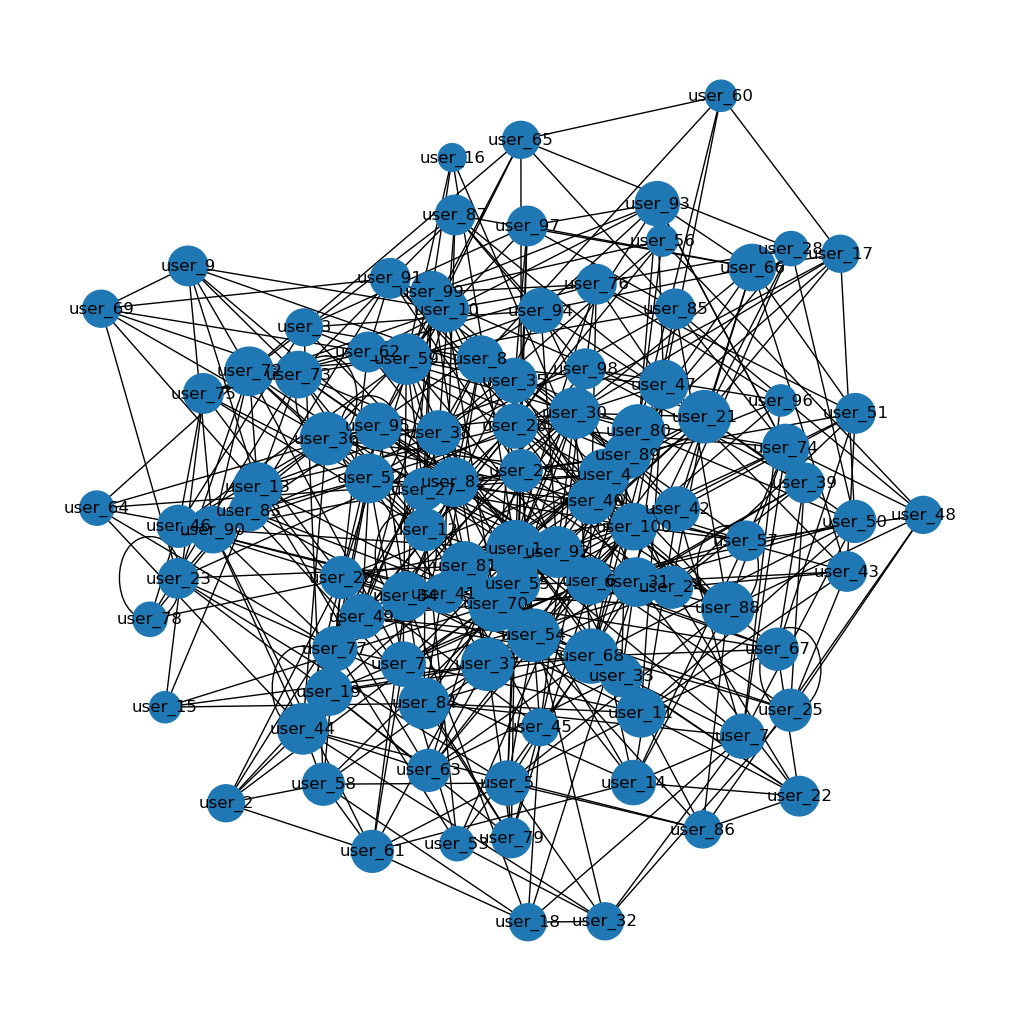

In [17]:
plt.figure(figsize=(10,10))
node_size = [v * 10000 for v in centrality_dict.values()]
nx.draw(G, pos, node_size=node_size, with_labels=True)
plt.show()


### 3.3 Clustering Coefficient

The clustering coefficient of a node in a network measures how close its neighbors are to being a clique (complete graph). It gives an indication of the "cliquishness" of the network.

In communication research, a high average clustering coefficient might indicate a tight-knit community where everyone knows everyone else.

#### NetworkX Function for Clustering Coefficient

NetworkX has a function to compute the clustering coefficient for all nodes in a network, `nx.clustering()`. Here's an example:

In [18]:
clustering_dict = nx.clustering(G)
nx.set_node_attributes(G, clustering_dict, 'clustering')

In [26]:
np.mean(list(clustering_dict.values()))

0.11216386554621849

In the code above, `nx.clustering(G)` returns a dictionary where the keys are the nodes and the values are their corresponding clustering coefficient.

#### Visualizing Clustering Coefficient

When visualizing a network, nodes with a higher clustering coefficient can be displayed with a larger size or a different color.

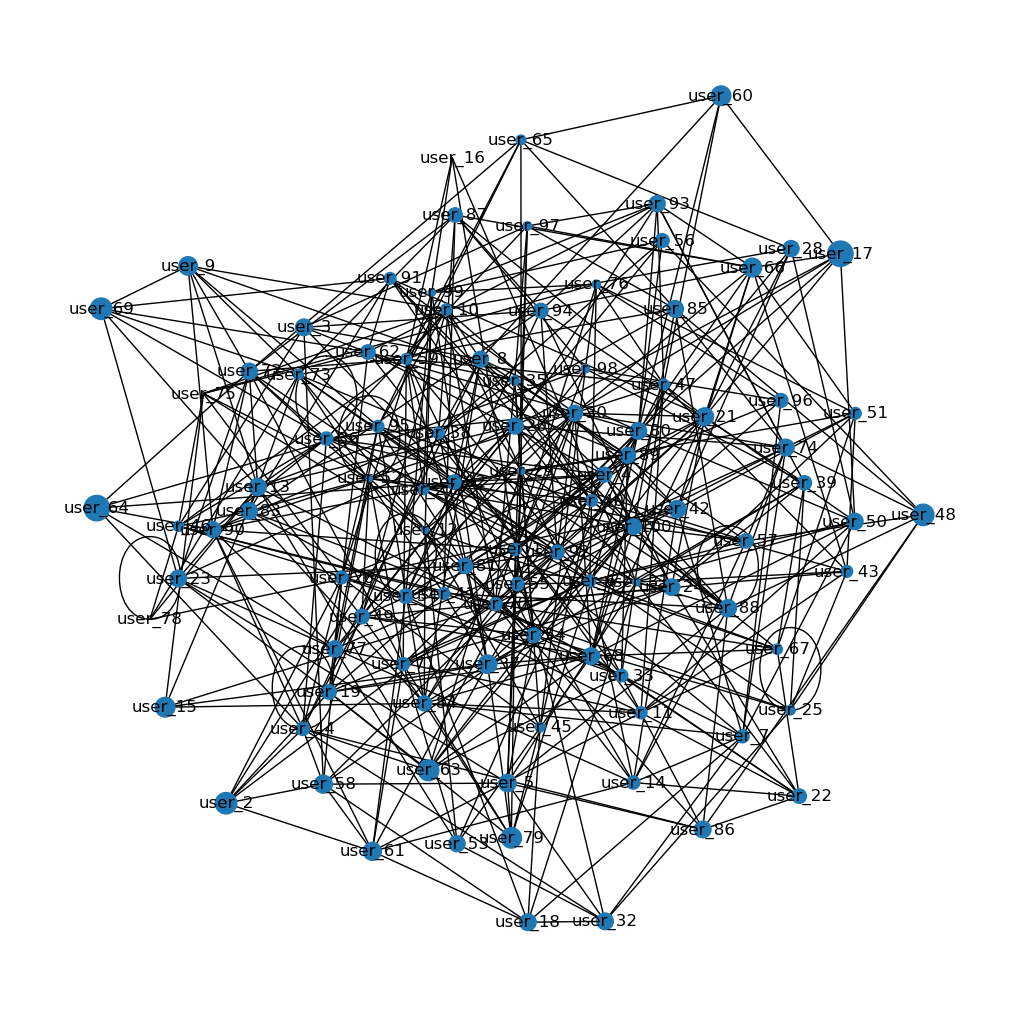

In [27]:
plt.figure(figsize=(10,10))
node_size = [v * 1000 for v in clustering_dict.values()]
nx.draw(G, pos, node_size=node_size, with_labels=True)
plt.show()

In the above code, we are visualizing the nodes with a size proportional to their clustering coefficient. Nodes with a higher clustering coefficient will appear larger.

### 3.4 Community Detection

Community detection is a process of partitioning nodes into groups or communities based on their connection patterns. Nodes in the same community are usually highly connected to each other.

In communication research, community detection can be useful to identify subgroups within a larger network that have more frequent or more intense interactions. For example, within a social network, communities might represent different social circles or groups that a person is part of.

#### NetworkX Function for Community Detection

NetworkX has several community detection algorithms. One commonly used method is the Louvain method, which is a greedy optimization method to find communities at a large scale. To use this method, we need to install and import the community module (`python-louvain`).

Here's an example of how to use the Louvain method for community detection:

In [28]:
!pip install community

  Using cached community-1.0.0b1-py3-none-any.whl
  Using cached Flask-2.3.2-py3-none-any.whl (96 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached Werkzeug-2.3.4-py3-none-any.whl (242 kB)
  Attempting uninstall: blinker
    Found existing installation: blinker 1.5
    Uninstalling blinker-1.5:
      Successfully uninstalled blinker-1.5


In [29]:
!pip install python-louvain

  Using cached python_louvain-0.16-py3-none-any.whl


In [30]:
import community.community_louvain as community_louvain

partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, 'modularity')

In [36]:
partition.values()

dict_values([6, 3, 2, 0, 1, 1, 5, 6, 2, 4, 4, 6, 0, 5, 3, 6, 2, 6, 1, 0, 4, 4, 4, 3, 3, 1, 5, 5, 6, 2, 5, 0, 4, 1, 4, 0, 1, 4, 4, 2, 5, 3, 2, 1, 5, 1, 4, 6, 0, 5, 2, 5, 3, 5, 6, 0, 5, 1, 0, 0, 0, 6, 5, 5, 3, 1, 6, 6, 1, 6, 6, 0, 5, 0, 5, 5, 4, 0, 5, 4, 6, 5, 0, 3, 1, 3, 5, 5, 3, 2, 3, 1, 4, 4, 2, 5, 5, 5, 1, 6])

In the above code, `community_louvain.best_partition(G)` returns a dictionary where keys are the nodes and the values are the community that node belongs to.

#### Visualizing Communities

When visualizing a network with communities, nodes from the same community can be displayed with the same color.

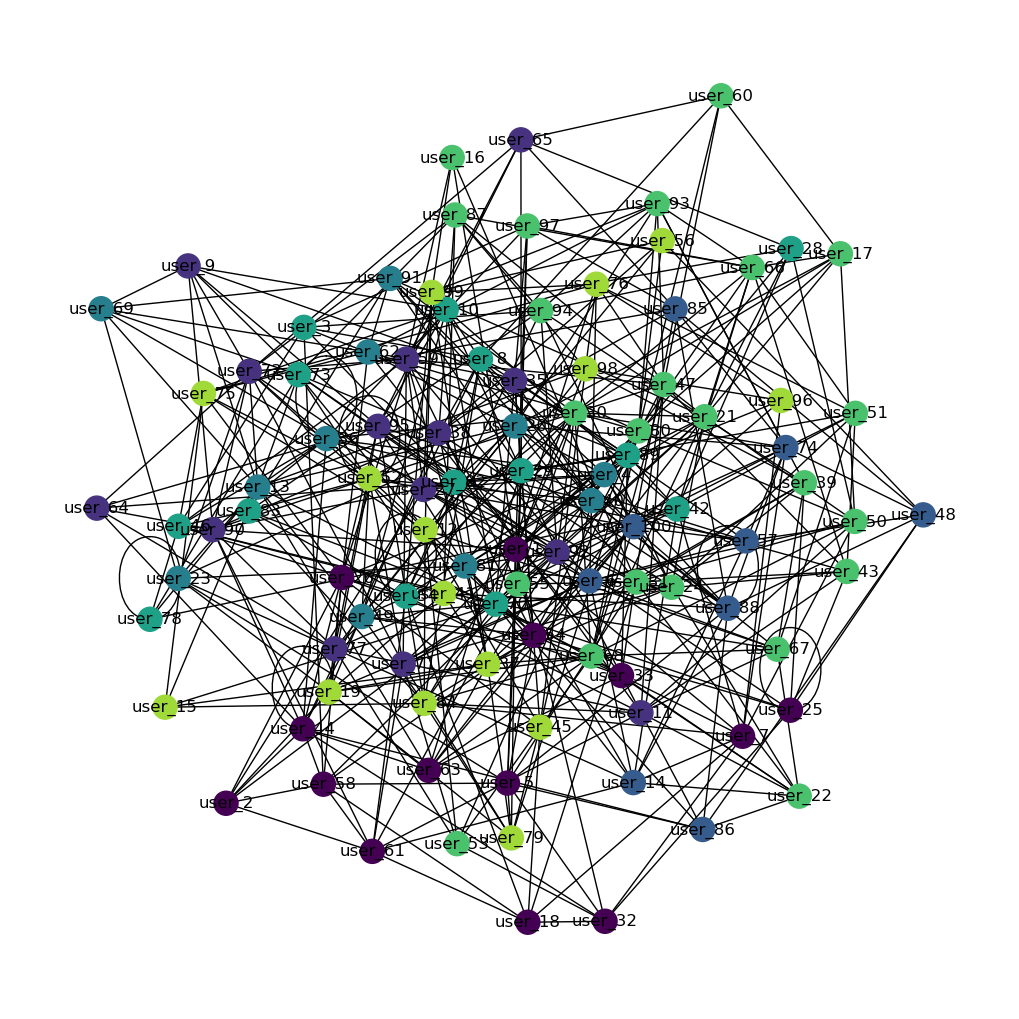

In [31]:
plt.figure(figsize=(10,10))
cmap = plt.get_cmap('viridis')
num_communities = max(partition.values()) + 1
node_color = [cmap(val / num_communities) for val in partition.values()]
nx.draw(G, pos, node_color=node_color, with_labels=True)
plt.show()

## Conclusion

In this notebook, we have covered the basic concepts and methods in network analysis, including the principles of graph theory, key network measures, and visualization of network data. We demonstrated how these techniques can be applied to the analysis of Twitter data.

Network analysis is an extremely valuable tool in communication research. The rise of digital communication platforms has led to an explosion in network data, from social networks like Twitter and Facebook, to hyperlink networks between websites, to co-authorship networks in academic publishing. The techniques we've learned here will enable you to extract meaningful insights from these complex datasets.

Here are some key takeaways:

1. **Nodes and Edges**: The fundamental elements of a network are nodes (individual entities) and edges (connections between them). In our Twitter example, nodes were users, and edges were replies, retweets, or mentions between users.
2. **Data Structures for Network Analysis**: Adjacency matrices and edge lists are commonly used data structures for network analysis. Each structure is suitable for different kinds of analysis and computational needs.
3. **Network Measures**: We discussed several network measures including degree, centrality, clustering coefficient, and community detection. These measures can reveal important characteristics about individual nodes as well as the overall network structure.
4. **Community Detection**: Communities are groups of nodes that are more densely connected to each other than to the rest of the network. Identifying these communities can provide insights into the structure and dynamics of the network.
5. **Visualization**: Visualizing networks can be a powerful way to explore and present your data. However, as networks get larger, effective visualization can become challenging.

Remember, network analysis is a complex and multifaceted discipline. What we have covered today is only a small fraction of what is possible. As you move forward in your research, I encourage you to explore more advanced topics in network analysis such as dynamic networks, network diffusion, and multiplex networks.

Network analysis opens up a new perspective on communication research. It allows us to view communication not just as a one-way or two-way process, but as a complex web of interactions that shape and are shaped by the broader social context. As you delve deeper into this fascinating field, you'll find that it offers not only new methods, but also new ways of thinking about the nature of communication itself.